<a href="https://colab.research.google.com/github/samuelmcilrath/forest-fires/blob/main/forestfires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from ucimlrepo import fetch_ucirepo #dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score


import matplotlib.pyplot as plt
%matplotlib inline

# Set the path to the file you'd like to load
file_path = "C:\MAIN\School\ML\Sem Proj\forest-fires\forestfires.ipynb"

# Load the latest version
forest_fires = pd.read_csv("forestfires_dataset.csv")

print("First 5 records:", forest_fires.head())
  

First 5 records:    X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [ ]:
###Transform Data - get splits
forest_fires = forest_fires.drop(columns=['month', 'day']) #drop month and day columns

#get rid of half of 90% of 0 area rows
ff_zeros = forest_fires[forest_fires['area'] == 0]
ff_nonzeros = forest_fires[forest_fires['area'] != 0]
print(ff_nonzeros.shape)
ff_zeros_reduced = ff_zeros.sample(frac=0.05, random_state=42)
forest_fires = pd.concat([ff_nonzeros, ff_zeros_reduced]).reset_index(drop=True)

X = forest_fires.drop(columns=['area', 'X', 'Y'])
Y = forest_fires[['area']]

Y_log = np.log1p(Y) #skewed to 0, apply log 

# Standardize numerical features - this standardizes mean to 0
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X_scaled, Y_log, test_size=0.2, random_state=42
)

##note 
#if going with classifier, try to make amounts of nonburn to burn 

(270, 11)


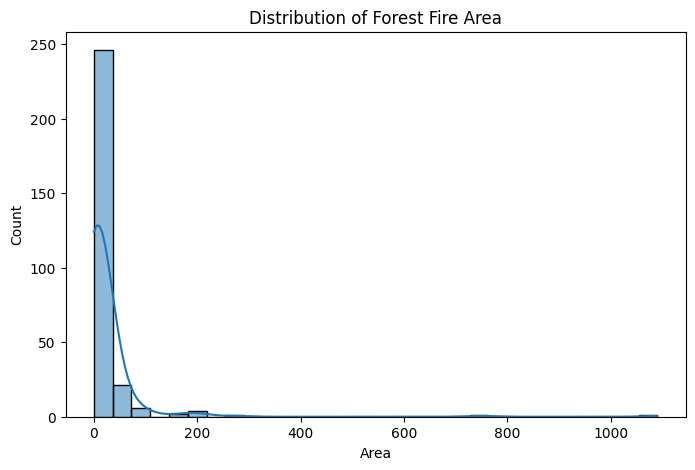

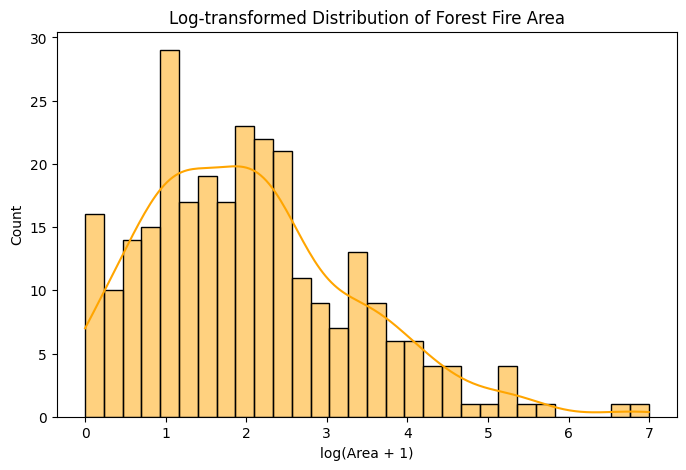

In [4]:
# Plotting the distribution of the target 'area'
plt.figure(figsize=(8, 5))
sns.histplot(Y['area'], bins=30, kde=True)
plt.title('Distribution of Forest Fire Area')
plt.xlabel('Area')
plt.show()

#plot the log-transformed target
plt.figure(figsize=(8, 5))
sns.histplot(np.log1p(Y['area']), bins=30, kde=True, color='orange')
plt.title('Log-transformed Distribution of Forest Fire Area')
plt.xlabel('log(Area + 1)')
plt.show()

In [5]:
# A helper function to evaluate models
def evaluate_model(model, X_test, y_test_log):
    # Predict in log-space then revert transformation
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test_log)
    
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f'RMSE: {rmse:.3f}')
    print(f'MAE: {mae:.3f}')
    print(f'R²: {r2:.3f}')
    return y_pred

#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train_log)
print("Linear Regression Performance:")
lin_y_pred = evaluate_model(lin_reg, X_test, y_test_log)

#Ridge Regression (regularized linear model)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train_log)
print("\nRidge Regression Performance:")
ridge_y_pred = evaluate_model(ridge, X_test, y_test_log)

#Lasso Regression 
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train_log)
print("\nLasso Regression Performance:")
lasso_y_pred = evaluate_model(lasso, X_test, y_test_log)

# Neural Network with MLPRegressor
mlp_reg = MLPRegressor(solver ="adam" , hidden_layer_sizes=(100), activation='logistic')

mlp_reg.fit(X_train, y_train_log)
print("\nNeural Network (MLPRegressor) Performance:")
mlp_y_pred = evaluate_model(mlp_reg, X_test, y_test_log)

Linear Regression Performance:
RMSE: 30.913
MAE: 13.421
R²: -0.062

Ridge Regression Performance:
RMSE: 30.913
MAE: 13.420
R²: -0.062

Lasso Regression Performance:
RMSE: 31.145
MAE: 12.945
R²: -0.078


c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Neural Network (MLPRegressor) Performance:
RMSE: 30.936
MAE: 13.320
R²: -0.064


In [6]:
#LINEAR REGRESSION

#Train the model by fitting it to the training data
lr = LinearRegression()
lr = lr.fit(X_train, y_train_log)

lr.coef_

#Test the model by predicting the test results
y_pred = lr.predict(X_test)

print("Test set targets:\n", y_test_log)
print("Test set predictions:\n", y_pred)
print("Test set R^2: {:.2f}".format(lr.score(X_test, y_test_log)))

Test set targets:
          area
92   4.494127
93   4.566221
179  1.368639
124  2.329227
261  2.469793
233  1.854734
77   3.389799
9    0.672944
251  3.311637
264  1.916923
223  0.285179
268  4.012592
250  0.828552
213  5.229824
226  2.394252
45   2.057963
42   1.845300
146  0.947789
33   1.305626
244  1.432701
46   2.074429
247  1.166271
108  0.215111
220  2.793616
279  0.000000
216  1.785070
147  1.564441
154  1.465568
90   4.175925
68   2.800325
112  2.199444
113  0.518794
271  0.000000
137  2.197225
210  2.081938
197  3.439777
158  1.141033
126  2.300583
30   1.261298
22   1.011601
24   1.078410
211  1.235471
66   2.707383
221  0.431782
164  1.960095
241  1.078410
148  1.688249
207  1.726332
165  1.921325
227  2.005526
6    0.570980
73   3.295837
238  2.029463
56   2.398804
60   2.504709
25   1.081805
79   3.444257
Test set predictions:
 [[ 2.26497176]
 [ 2.18039347]
 [ 1.87604702]
 [ 1.80868716]
 [-2.10068553]
 [ 1.97976649]
 [ 2.33126535]
 [ 2.1495278 ]
 [ 1.96427881]
 [ 2.019434

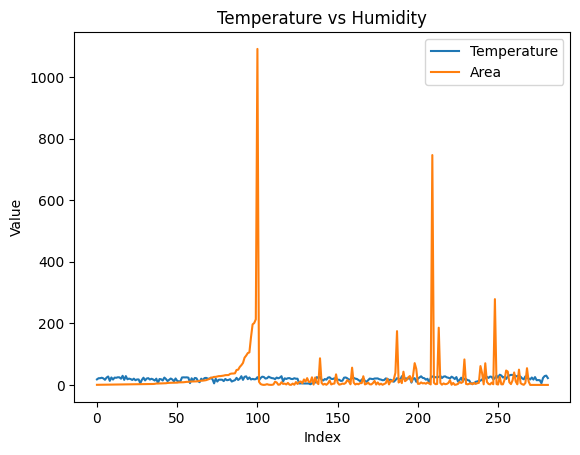

In [7]:
plt.plot(forest_fires.index, forest_fires['temp'], label='Temperature')
plt.plot(forest_fires.index, forest_fires['area'], label='Area')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Temperature vs Humidity')
plt.legend()
plt.show()

In [ ]:
#transform to either 0 or 1
Y_bin = Y.copy()
Y_bin['area'] = (Y_bin['area'] != 0).astype(int)


# resplit into training and test sets
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X, Y_bin, test_size=0.2, random_state=42
)

     area
0       1
1       1
2       1
3       1
4       1
..    ...
277     0
278     0
279     0
280     0
281     0

[282 rows x 1 columns]
     area
0    0.36
1    0.43
2    0.47
3    0.55
4    0.61
..    ...
277  0.00
278  0.00
279  0.00
280  0.00
281  0.00

[282 rows x 1 columns]


In [ ]:
#Logistic Regression
log_reg = LogisticRegression(max_iter= 10000)
log_reg.fit(X_train_bin, y_train_bin['area'])  # Just use the 'area' column
y_pred = log_reg.predict(X_test_bin)

# Accuracy
print("Accuracy:", accuracy_score(y_test_bin['area'], y_pred))

#SVM
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train_bin['area'])
y_pred_svm = svm.predict(X_test)


mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train_bin['area'])
y_pred_mlp = mlp.predict(X_test)

print("Neural Net Accuracy:", accuracy_score(y_test_bin['area'], y_pred_mlp))

print("SVM Accuracy:", accuracy_score(y_test_bin['area'], y_pred_svm))

print("Neural Net Accuracy:", accuracy_score(y_test_bin['area'], y_pred_mlp))

Accuracy: 0.9649122807017544
SVM Accuracy: 0.9649122807017544
